# Estudo de tratamento de dados usando python

In [184]:
# Funções
def plot_histogram(df, column):
    for col in df[column].columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.show()

## 1 - Importando as libs e os dados

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn.model_selection as ms
import sklearn.linear_model as lm

In [186]:
# Lendo o arquivo csv
df_student_info = pd.read_csv("archive/student_admission_record_dirty.csv")

## 2 - Análise exploratória

In [187]:
# Visualizando os dados
df_student_info.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN


In [188]:
# Exibindo as informações do df
df_student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


In [189]:
df_student_info.isnull().sum()

Name                      10
Age                       10
Gender                    10
Admission Test Score      11
High School Percentage    11
City                      10
Admission Status          10
dtype: int64

In [190]:
print(f"Número de linhas duplicadas: {df_student_info.duplicated().sum()}")

Número de linhas duplicadas: 6


## 3 - Tratamento dos dados

In [191]:
qtd_lines_before = len(df_student_info)

### 3.1 - Tratando duplicatas

In [192]:
# Contando o número de linhas antes do tratamento
print(f"Total de linhas antes do tratamento: {qtd_lines_before}")

Total de linhas antes do tratamento: 157


In [193]:
df_student_info = df_student_info.drop_duplicates()

In [194]:
print(f"Total de linhas após o tratamento: {qtd_lines_before - len(df_student_info)}")
# Foram removidas 6 linhas duplicadas

Total de linhas após o tratamento: 6


### 3.2 - Tratando valores nulos

#### 3.2.1 - Variáveis categóricas

In [195]:
# Retirando a coluna City e Name do nosso DataFrame
df_student_info_filtered = df_student_info.drop(columns=['City', 'Name'], axis=1)

# Identifiquei que ela não é necessária para o nosso modelo

In [196]:
# Removendo os valores nulos de Admission Status e Gender
df_student_info_filtered = df_student_info_filtered.dropna(subset=['Admission Status', 'Gender'])
df_student_info_filtered[['Admission Status', 'Gender']].isnull().sum()

Admission Status    0
Gender              0
dtype: int64

In [197]:
# Usando o LabelEncoder para transformar a coluna Admission Status em numéricas
le = LabelEncoder()
df_student_info_filtered['Admission Status'] = le.fit_transform(df_student_info_filtered['Admission Status'])
df_student_info_filtered['Admission Status'].head(5)

0    1
2    0
3    1
5    0
6    0
Name: Admission Status, dtype: int32

In [198]:
# Total de linhas após o tratamento
print(f"total de linhas após o tratamento: {len(df_student_info_filtered)}")
print(f"Total de linhas removidas: {qtd_lines_before - len(df_student_info_filtered)}")

total de linhas após o tratamento: 132
Total de linhas removidas: 25


#### 3.2.2 - Variáveis numéricas

In [199]:
# Definindo apenas colunas numéricas 
numeric_columns = []
for c in df_student_info.columns[0:7].tolist():
    if df_student_info.dtypes[c] == 'float64' or df_student_info.dtypes[c] == 'int64':
        numeric_columns.append(c)
        print(c)
        
df_student_info_numerics = df_student_info[numeric_columns]

Age
Admission Test Score
High School Percentage


In [200]:
# Calculando medidas estatísticas: Média, Mediana
# Criando arrays com as colunas numéricas
mean = {}
median = {}
for col in df_student_info_filtered[numeric_columns].columns:
    mean[col] = df_student_info_filtered[col].mean()
    median[col] = df_student_info_filtered[col].median()
    print(f"Média da coluna {col}: {mean[col]}")
    print(f"Mediana da coluna {col}: {median[col]}")
    print("\n")


Média da coluna Age: 19.764227642276424
Mediana da coluna Age: 20.0


Média da coluna Admission Test Score: 76.95934959349593
Mediana da coluna Admission Test Score: 78.0


Média da coluna High School Percentage: 76.46123966942147
Mediana da coluna High School Percentage: 78.09




In [201]:
# Substituindo os valores nulos pela mediana

for col in df_student_info_filtered[numeric_columns].columns:
    df_student_info_filtered[col] = df_student_info_filtered[col].fillna(median[col])

df_student_info_filtered[numeric_columns].isnull().sum()

Age                       0
Admission Test Score      0
High School Percentage    0
dtype: int64

### 3.3 - Tratando outliers

#### 3.3.1 - Plotando boxplot

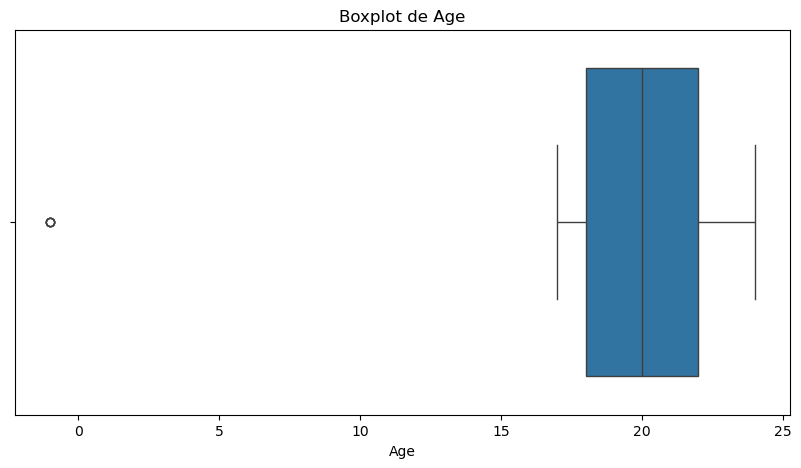

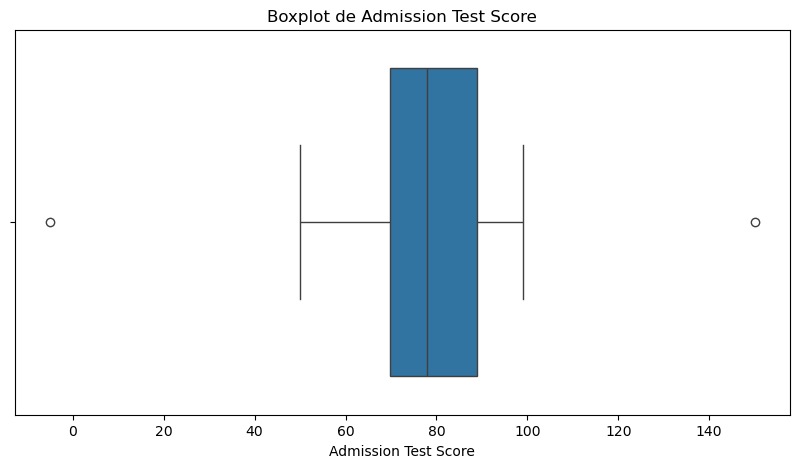

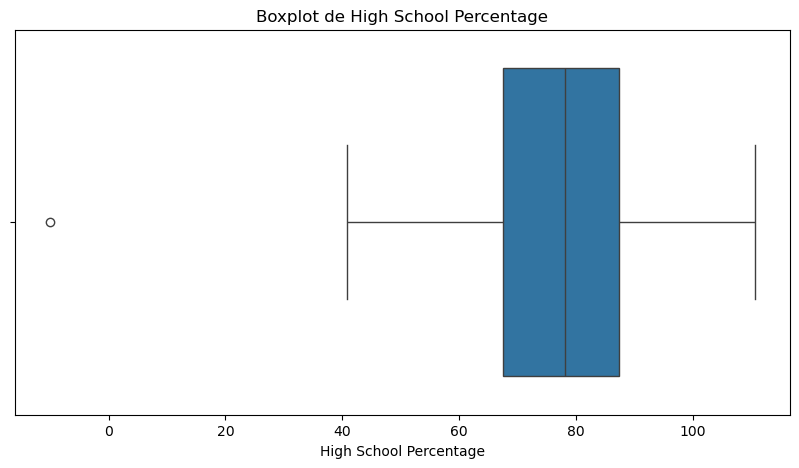

In [202]:
# Plotando um boxplot para ver a distribuição dos dados e identificar outliers
plot_histogram(df_student_info_filtered, numeric_columns)

#### 3.3.2 - Tratando casos impossíveis

In [203]:
print('Linhas antes do tratamento: ', len(df_student_info_filtered))

Linhas antes do tratamento:  132


In [204]:
df_student_info_filtered = df_student_info_filtered[
    (df_student_info_filtered['Age'] > 0) & 
    (df_student_info_filtered['Admission Test Score'] > 0) &
    (df_student_info_filtered['Admission Test Score'] <= 100) & 
    (df_student_info_filtered['High School Percentage'] <= 100) &
    (df_student_info_filtered['High School Percentage'] >= 0) 
]

# Como o criador passou um contexto das variáveis, eu retirei alguns possíveis outliers impossíveis, exemplo: a idade ser menor ou igual a 0 

In [205]:
print('Linhas depois do tratamento: ', len(df_student_info_filtered))

Linhas depois do tratamento:  124


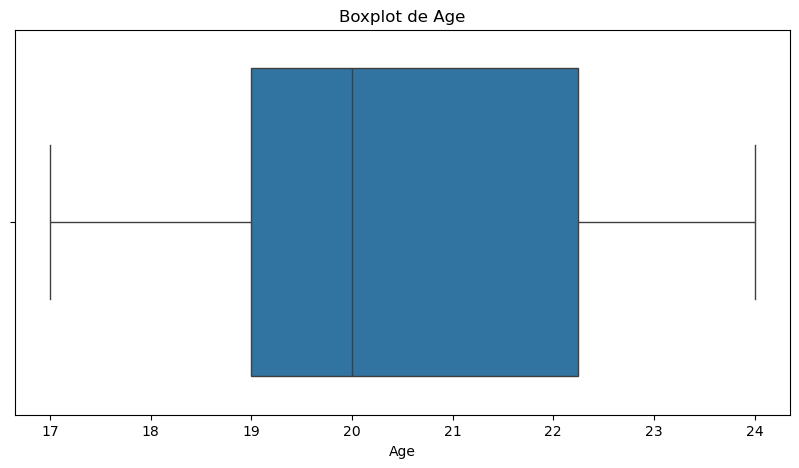

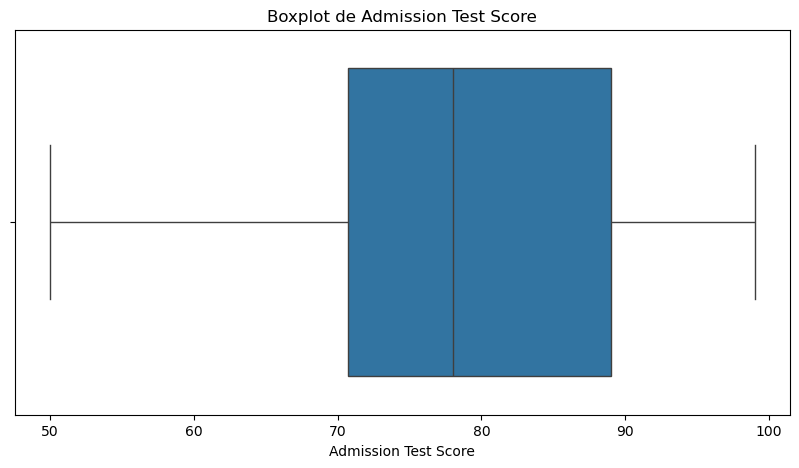

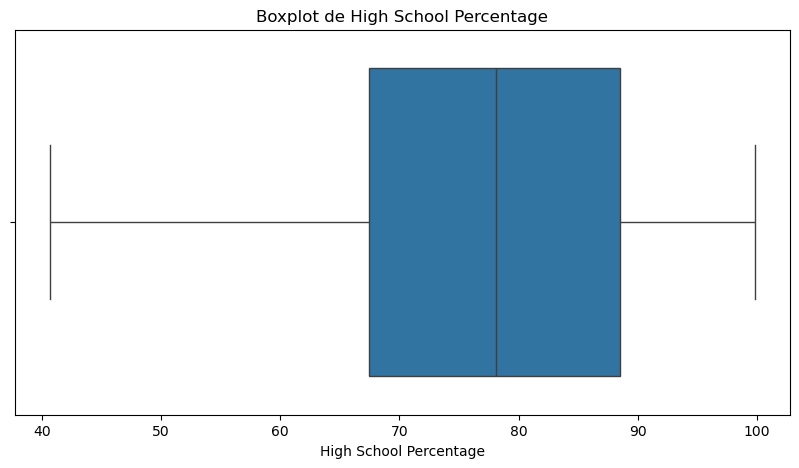

In [206]:
# Verificando novamente o histograma para ver se os outliers foram retirados
plot_histogram(df_student_info_filtered, numeric_columns)

## 4 - Base tratada

In [207]:
display(df_student_info_filtered)

,Age,Gender,Admission Test Score,High School Percentage,Admission Status
0,24.0,Female,50.0,68.90,1
2,17.0,Male,89.0,78.09,0
3,17.0,Male,55.0,85.29,1
5,23.0,Female,78.0,78.09,0
6,18.0,Male,78.0,97.31,0
...,...,...,...,...,...
151,20.0,Female,95.0,52.40,1
152,19.0,Female,85.0,78.09,0
153,17.0,Female,81.0,84.40,1
154,21.0,Female,98.0,50.86,0


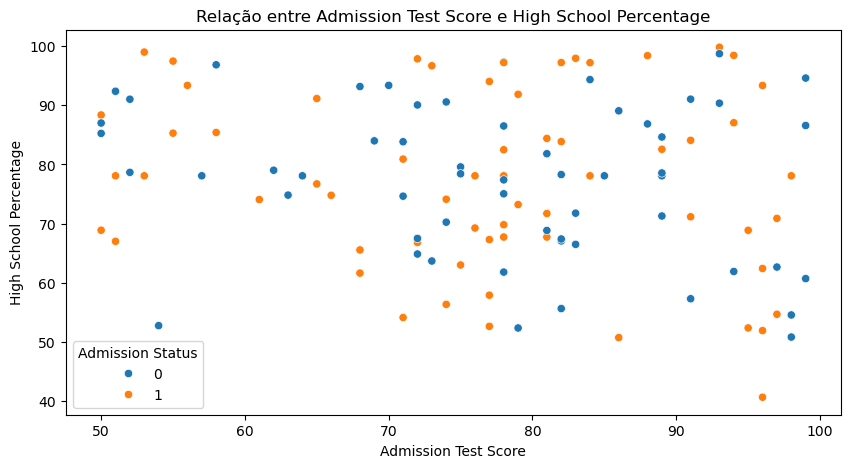

In [208]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_student_info_filtered, x='Admission Test Score', y='High School Percentage', hue='Admission Status')
plt.title('Relação entre Admission Test Score e High School Percentage')
plt.xlabel('Admission Test Score')
plt.ylabel('High School Percentage')
plt.show()

## 5 - Modelo de machine learning

In [209]:
# Criando um df com as var dependentes e independentes

X = df_student_info_filtered.drop(columns=['Admission Status'])
y = df_student_info_filtered['Admission Status'].values

In [210]:
# dummyzando a variável categórica Gender

X_dummy = pd.get_dummies(X)

In [211]:
# # Separando os dados em treino e teste

X_train, X_test, y_train, y_test = ms.train_test_split(x_dummy, y, test_size=0.2, random_state=42)

In [212]:
# Treinando o modelo de regressão linear
regressor = lm.LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [213]:
y_pred = regressor.predict(X_test)

In [216]:
# Comparando os resultados
np.set_printoptions(precision = 2)
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
result

array([[1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0]])

In [217]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[-0.04  0.    0.   -0.15  0.15]]
Intercept: [0.33]
